Обзор функций

Ниже приведены ключевые столбцы, включенные в очищенный набор данных (неочищенная версия содержит более или менее одинаковые поля):

Product_title - Полное название/название продукта

Product_rating - Средний рейтинг клиентов (числовой) из 5

Total_reviews – Общее количество отзывов клиентов

Purchased_last_month - Единицы, приобретенные в прошлом месяце

Discounted_price - Текущая цена после скидки

Original_price - Первоначальная указанная цена до скидки

Discount_percentage - Процентная скидка, примененная к продукту

Is_best_seller - Указывает, помечен ли продукт как бестселлер

Is_sponsored - Является ли продукт спонсируемым или органическим

Has_coupon - Специальные купоны на скидку (True/False)

Buy_box_availability - Доступность кнопки BuyBox на странице поиска Amazon, как добавить в корзину (значения nan представляют False)

Дата доставки - Предполагаемая дата доставки (преобразуется в формат datetime)

Sustainability_tags - Экологически чистые и связанные с устойчивым развитием теги

Product_image_url – Прямая ссылка на изображение продукта

Product_page_url - Официальный URL-адрес страницы продукта Amazon

Data_collected_at – Дата сбора данных

Product_category - Назначенная категория продукта на основе названия

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import time


In [2]:
df = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/kaggle/amazon_products_sales_data_cleaned.csv')
df.head().T

,0,1,2,3,4
product_title,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...","DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...","Apple AirPods Pro 2 Wireless Earbuds, Active N...",Apple AirTag 4 Pack. Keep Track of and find Yo...
product_rating,4.6,4.3,4.6,4.6,4.8
total_reviews,375.0,2457.0,3044.0,35882.0,28988.0
purchased_last_month,300.0,6000.0,2000.0,10000.0,10000.0
discounted_price,89.68,9.99,314.0,162.24,72.74
original_price,159.0,15.99,349.0,162.24,72.74
is_best_seller,No Badge,No Badge,No Badge,Best Seller,No Badge
is_sponsored,Sponsored,Sponsored,Sponsored,Organic,Organic
has_coupon,Save 15% with coupon,No Coupon,No Coupon,No Coupon,No Coupon
buy_box_availability,Add to cart,Add to cart,Add to cart,NaN,NaN


In [3]:
print(df.shape)
df.info()

(42675, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product

Распределение по категориям:
product_category
Other Electronics      8755
Laptops                8693
Phones                 6563
Cameras                3677
Power & Batteries      2877
TV & Display           2630
Chargers & Cables      1833
Storage                1630
Speakers               1345
Networking             1070
Headphones              997
Printers & Scanners     877
Gaming                  809
Smart Home              465
Wearables               454
Name: count, dtype: int64


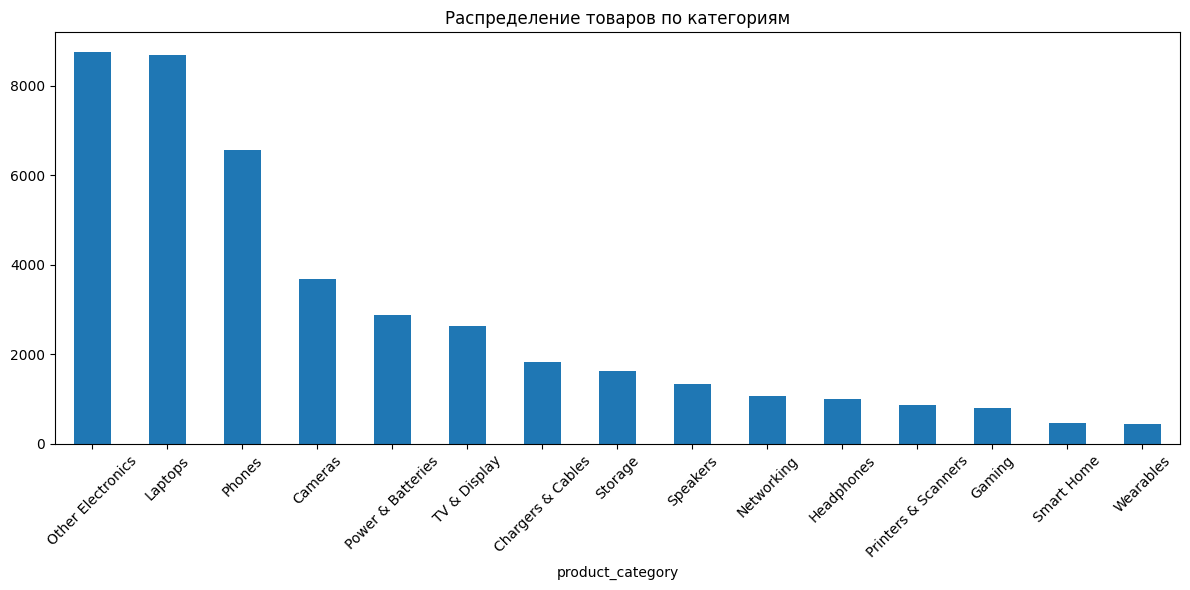

In [10]:
# Смотрим распределение
category_counts = df_clean['product_category'].value_counts()
print("Распределение по категориям:")
print(category_counts)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Распределение товаров по категориям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_rating,41651.0,4.399431,0.386997,1.00,4.20,4.50,4.70,5.00
total_reviews,41651.0,3087.106000,13030.460133,1.00,82.00,343.00,1886.00,865598.00
purchased_last_month,32164.0,1293.665278,6318.323574,50.00,100.00,200.00,400.00,100000.00
discounted_price,40613.0,243.227289,473.351545,2.16,29.69,84.99,224.00,5449.00
original_price,40613.0,257.611107,496.633495,2.16,32.99,89.00,229.99,5449.00
discount_percentage,40613.0,6.547151,12.744715,0.00,0.00,0.00,8.49,85.42


In [5]:
missing_analysis = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('missing_percentage', ascending=False)

print("Анализ пропусков:")
print(missing_analysis)

Анализ пропусков:
                      missing_count  missing_percentage
sustainability_tags           39267           92.014060
buy_box_availability          14653           34.336262
delivery_date                 11983           28.079672
purchased_last_month          10511           24.630346
product_page_url               2069            4.848272
discount_percentage            2062            4.831869
discounted_price               2062            4.831869
original_price                 2062            4.831869
total_reviews                  1024            2.399531
product_rating                 1024            2.399531
product_category                  0            0.000000
data_collected_at                 0            0.000000
product_title                     0            0.000000
product_image_url                 0            0.000000
is_sponsored                      0            0.000000
is_best_seller                    0            0.000000
has_coupon                    

In [6]:
df['is_best_seller'].value_counts()

is_best_seller
No Badge             40814
Amazon's               744
Limited time deal      409
Best Seller            275
Save 30%               125
Ends in                 97
Save 10%                61
Save 18%                57
Save 17%                51
Save 12%                26
Save 9%                 14
Save 77%                 2
Name: count, dtype: int64

In [7]:
df_clean = df.copy()

# заполняем медианой по категории пропущенные значения рейтинга
df_clean['product_rating'] = df_clean.groupby('product_category')['product_rating'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['total_reviews'] = df_clean.groupby('product_category')['total_reviews'].transform(
    lambda x: x.fillna(x.median())
)

# Ценновые признаки
df_clean['discounted_price'] = df_clean.groupby('product_category')['discounted_price'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['original_price'] = df_clean['original_price'].fillna(df_clean['discounted_price'])

# Пересчитаем скидку
df_clean['discounted_percentage'] = ((df_clean['original_price'] - df_clean['discounted_price']) / 
                                     df_clean['original_price'] * 100).fillna(0)

high_missing_cols = ['purchased_last_month', 'buy_box_availability', 'delivery_date', 'sustainability_tags']

for col in high_missing_cols:
    df_clean[f'{col}_missing'] = df_clean[col].isnull().astype(int)
    
# Заполняем числовые медианой, категориальные модой
if 'purchased_last_month' in df_clean.columns:
    df_clean['purchased_last_month'] = df_clean['purchased_last_month'].fillna(0)
if 'buy_box_availability' in df_clean.columns:
    df_clean['buy_box_availability'] = df_clean['buy_box_availability'].fillna('Unknown')

In [8]:
df_clean.isna().sum()

product_title                       0
product_rating                      0
total_reviews                       0
purchased_last_month                0
discounted_price                    0
original_price                      0
is_best_seller                      0
is_sponsored                        0
has_coupon                          0
buy_box_availability                0
delivery_date                   11983
sustainability_tags             39267
product_image_url                   0
product_page_url                 2069
data_collected_at                   0
product_category                    0
discount_percentage              2062
discounted_percentage               0
purchased_last_month_missing        0
buy_box_availability_missing        0
delivery_date_missing               0
sustainability_tags_missing         0
dtype: int64

In [13]:
def map_badge(badge): 
    badge_str = str(badge)
    if badge in ['Best Seller', "Amazon's"]:
        return 'premium'
    if badge == 'Limited time deal':
        return 'promo'
    elif 'Save' in badge_str:
        return 'discount'
    elif badge == 'Ends in':
        return 'urgency'
    else:
        return 'no_badge'
    
df_clean['badge_type'] = df_clean['is_best_seller'].apply(map_badge)
df_clean['is_success'] = df_clean['badge_type'].isin(['premium', 'promo']).astype(int)

# feature engineering
df_clean['price_ratio'] = df_clean['discounted_price'] / df_clean['original_price']
df_clean['reviews_per_price'] = df_clean['total_reviews'] / (df_clean['discounted_price'] + 1)
df_clean['is_discounted'] = (df_clean['discount_percentage'] > 0).astype(int)
df_clean['absolute_discount'] = df_clean['original_price'] - df_clean['discounted_price']

# Обработка дат
df_clean['data_collected_at'] = pd.to_datetime(df_clean['data_collected_at'])
if 'delivery_date' in df_clean.columns:
    df_clean['delivery_date'] = pd.to_datetime(df_clean['delivery_date'], errors='coerce')
    df_clean['days_to_delivery'] = (df_clean['delivery_date'] - df_clean['data_collected_at']).dt.days
    df_clean['days_to_delivery'] = df_clean['days_to_delivery'].fillna(df_clean['days_to_delivery'].median())

# Кодировка
df_clean['is_sponsored_encoded'] = df_clean['is_sponsored'].apply(lambda x: 1 if x =='Sponsored' else 0)
category_target_encoding = df_clean.groupby('product_category')['is_success'].mean()
df_clean['category_target_encoded'] = df_clean['product_category'].map(category_target_encoding)

# One-Hot для топ-5 самых распространенных категорий
top_5_categories = df_clean['product_category'].value_counts().head(5).index
for category in top_5_categories:
    safe_name = category.replace(' & ', '_').replace(' ', '_')
    df_clean[f'cat_{safe_name}'] = (df_clean['product_category'] == category).astype(int)

print(f"Созданы фичи для категорий: {list(top_5_categories)}")

Созданы фичи для категорий: ['Other Electronics', 'Laptops', 'Phones', 'Cameras', 'Power & Batteries']


In [14]:
if 'buy_box_availability' in df_clean.columns:
    df_clean['has_buy_box'] = (~df_clean['buy_box_availability'].isna()).astype(int)
    
if 'sustainability_tags' in df_clean.columns:
    df_clean['has_sustainability'] = (~df_clean['sustainability_tags'].isna()).astype(int)

if 'purchased_last_month' in df_clean.columns:
    df_clean['purchased_last_month'] = df_clean['purchased_last_month'].fillna(0)

# Флаг купона
df_clean['has_coupon_encoded'] = df_clean['has_coupon'].apply(
    lambda x: 1 if 'coupon' in str(x).lower() else 0
)

In [15]:
# Базовые фичи
base_features = [
    'product_rating', 'total_reviews', 'discounted_price', 'original_price',
    'discount_percentage', 'price_ratio', 'reviews_per_price', 'is_discounted',
    'absolute_discount', 'is_sponsored_encoded', 'has_coupon_encoded',
    'category_target_encoded'  # самая важная категориальная фича
]

# One-Hot категории
one_hot_features = [f'cat_{cat.replace(" & ", "_").replace(" ", "_")}' for cat in top_5_categories]

# Дополнительные фичи (если есть)
additional_features = []
if 'days_to_delivery' in df_clean.columns:
    additional_features.append('days_to_delivery')
if 'purchased_last_month' in df_clean.columns:
    additional_features.append('purchased_last_month')
if 'has_buy_box' in df_clean.columns:
    additional_features.append('has_buy_box')
if 'has_sustainability' in df_clean.columns:
    additional_features.append('has_sustainability')

all_features = base_features + one_hot_features + additional_features

print(f"🎯 ФИНАЛЬНЫЙ НАБОР ФИЧ: {len(all_features)}")
print("Список фичей:")
for i, feature in enumerate(all_features, 1):
    print(f"  {i:2d}. {feature}")

🎯 ФИНАЛЬНЫЙ НАБОР ФИЧ: 21
Список фичей:
   1. product_rating
   2. total_reviews
   3. discounted_price
   4. original_price
   5. discount_percentage
   6. price_ratio
   7. reviews_per_price
   8. is_discounted
   9. absolute_discount
  10. is_sponsored_encoded
  11. has_coupon_encoded
  12. category_target_encoded
  13. cat_Other_Electronics
  14. cat_Laptops
  15. cat_Phones
  16. cat_Cameras
  17. cat_Power_Batteries
  18. days_to_delivery
  19. purchased_last_month
  20. has_buy_box
  21. has_sustainability


In [17]:
X = df_clean[all_features].copy()
y = df_clean['is_success']

# Заполняем возможные оставшиеся пропуски
X = X.fillna(X.median())

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабируем фичи
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


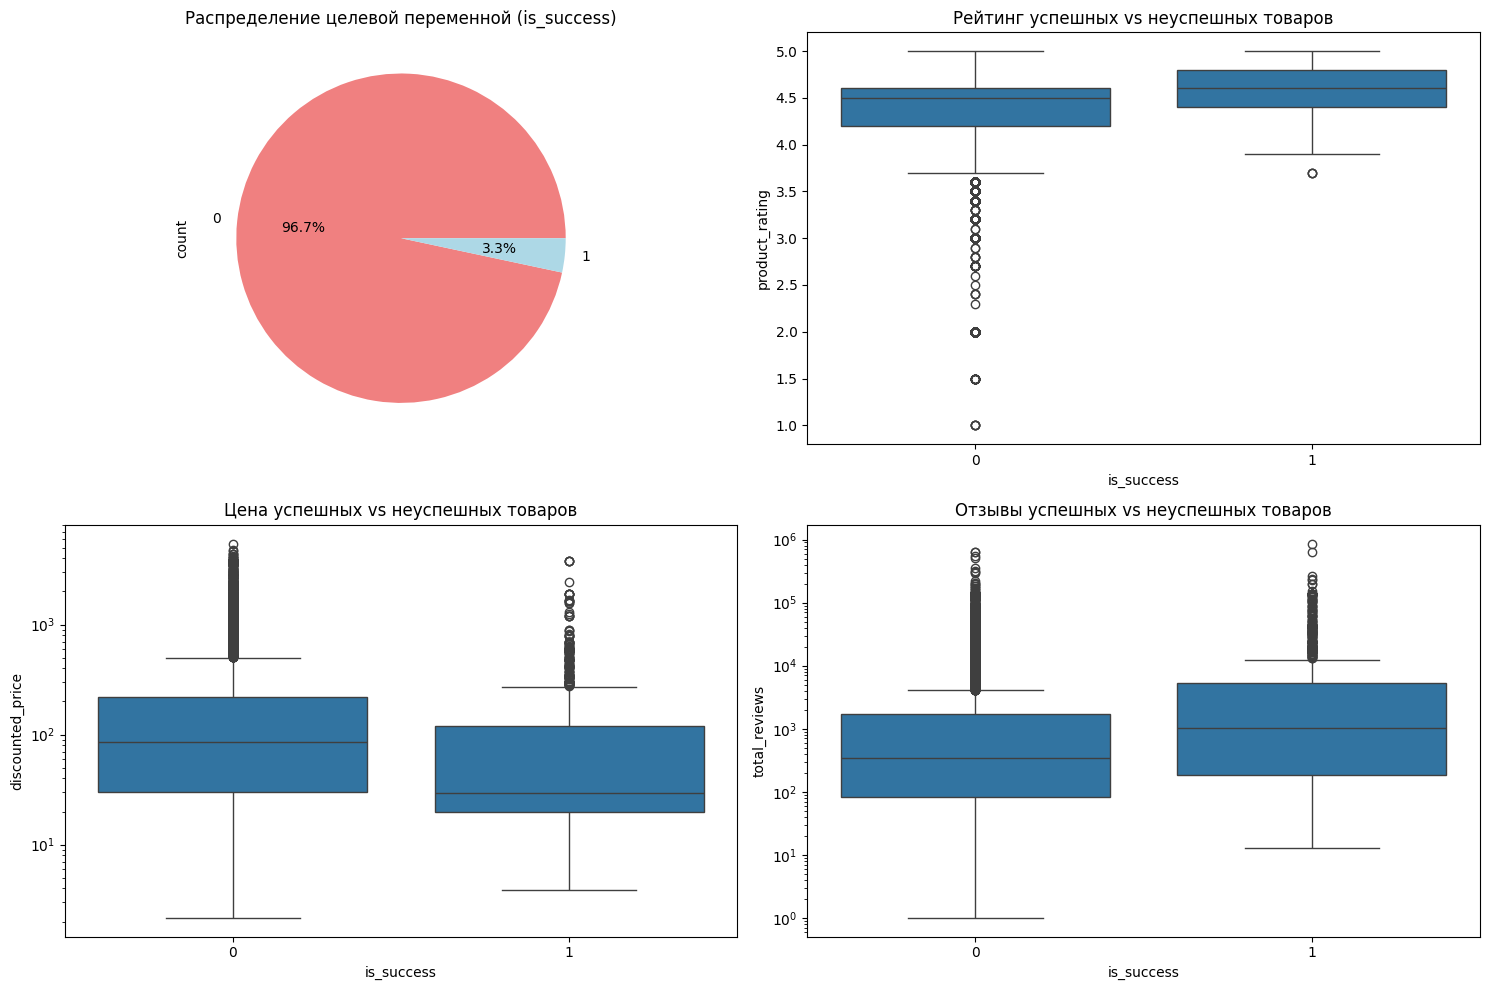

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Распределение целевой переменной
y_train.value_counts().plot.pie(ax=axes[0,0], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[0,0].set_title('Распределение целевой переменной (is_success)')

# 2. Рейтинг vs Успешность
sns.boxplot(data=df_clean, x='is_success', y='product_rating', ax=axes[0,1])
axes[0,1].set_title('Рейтинг успешных vs неуспешных товаров')

# 3. Цена vs Успешность
sns.boxplot(data=df_clean, x='is_success', y='discounted_price', ax=axes[1,0])
axes[1,0].set_title('Цена успешных vs неуспешных товаров')
axes[1,0].set_yscale('log')

# 4. Количество отзывов vs Успешность
sns.boxplot(data=df_clean, x='is_success', y='total_reviews', ax=axes[1,1])
axes[1,1].set_title('Отзывы успешных vs неуспешных товаров')
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

In [22]:
def check_models(X_train, X_test, y_train, y_test, model_dict = None):
    '''
    Сравниваем несколько моделей с расширенными метриками
    '''

    if model_dict is None:
        model_dict = {
            'Logistic Regression' : LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
            'CatBoost' : CatBoostClassifier(random_state=42, verbose=False, thread_count=-1)
        }

        results = {}

        for name, model in model_dict.items():
            print(f'Обучение {name}')
            start_time = time.time()

            model.fit(X_train, y_train)
            train_time = time.time() - start_time

            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:,1]

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)

            cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()

            # Save
            results[name] = {
                'model' : model,
                'accuracy' : accuracy,
                'f1_score' : f1,
                'roc_auc' : roc_auc,
                'precision' : precision,
                'recall' : recall,
                'cv_mean' : cv_mean,
                'cv_std' : cv_std,
                'train_time' : train_time
            }
            print(f" {name} завершено за {train_time:.2f} сек")
        print(f"   F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}, CV-F1: {cv_mean:.4f} ± {cv_std:.4f}")
        print("-" * 60)
    
    return results

def print_comparison_table(results):
    """
    Красиво выводит таблицу сравнения моделей
    """
    comparison_data = []
    for name, metrics in results.items():
        comparison_data.append({
            'Model': name,
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'F1-Score': f"{metrics['f1_score']:.4f}",
            'ROC-AUC': f"{metrics['roc_auc']:.4f}",
            'Precision': f"{metrics['precision']:.4f}",
            'Recall': f"{metrics['recall']:.4f}",
            'CV F1': f"{metrics['cv_mean']:.4f} ± {metrics['cv_std']:.4f}",
            'Train Time (s)': f"{metrics['train_time']:.2f}"
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    df_comparison = df_comparison.sort_values('F1-Score', ascending=False)
    
    print("📊 ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ")
    print("=" * 90)
    print(df_comparison.to_string(index=False))
    print("=" * 90)
    
    return df_comparison

In [23]:
print("🔍 ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ...")
results = check_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Выводим таблицу сравнения
df_comparison = print_comparison_table(results)

🔍 ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ...
Обучение Logistic Regression
 Logistic Regression завершено за 0.04 сек
Обучение Random Forest
 Random Forest завершено за 0.35 сек
Обучение CatBoost
 CatBoost завершено за 3.55 сек
   F1: 0.5076, ROC-AUC: 0.8837, CV-F1: 0.5201 ± 0.0247
------------------------------------------------------------
📊 ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ
              Model Accuracy F1-Score ROC-AUC Precision Recall           CV F1 Train Time (s)
           CatBoost   0.9773   0.5076  0.8837    0.9259 0.3497 0.5201 ± 0.0247           3.55
      Random Forest   0.9770   0.5000  0.8743    0.9245 0.3427 0.5146 ± 0.0207           0.35
Logistic Regression   0.9672   0.0476  0.7621    0.8750 0.0245 0.0428 ± 0.0102           0.04


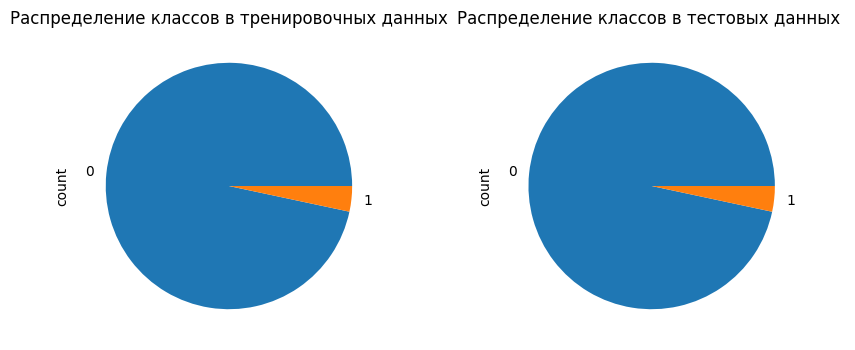

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
y_train.value_counts().plot.pie()
plt.title('Распределение классов в тренировочных данных')

plt.subplot(1, 2, 2)
y_test.value_counts().plot.pie()
plt.title('Распределение классов в тестовых данных ')
plt.show()

In [30]:
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate= 0.05,
    depth=8,
    l2_leaf_reg=5,
    scale_pos_weight=30,
    
    eval_metric='F1',
    # early_stopping_rounds=50,
    random_seed=42,
    verbose=100,
    thread_count=-1
)
print('Обучаем CatBoost с продвинутыми настройками')
catboost_model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), plot=True)

Обучаем CatBoost с продвинутыми настройками


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7426376	test: 0.7374557	best: 0.7374557 (0)	total: 8.78ms	remaining: 8.78s
100:	learn: 0.8354386	test: 0.7730826	best: 0.7875939 (62)	total: 533ms	remaining: 4.74s
200:	learn: 0.8698730	test: 0.7585523	best: 0.7875939 (62)	total: 1.08s	remaining: 4.3s
300:	learn: 0.8911098	test: 0.7411161	best: 0.7875939 (62)	total: 1.65s	remaining: 3.84s
400:	learn: 0.8992791	test: 0.7459089	best: 0.7875939 (62)	total: 2.2s	remaining: 3.29s
500:	learn: 0.9018413	test: 0.7326949	best: 0.7875939 (62)	total: 2.72s	remaining: 2.71s
600:	learn: 0.9029049	test: 0.7327948	best: 0.7875939 (62)	total: 3.24s	remaining: 2.15s
700:	learn: 0.9041004	test: 0.7247323	best: 0.7875939 (62)	total: 3.76s	remaining: 1.6s
800:	learn: 0.9049660	test: 0.7258223	best: 0.7875939 (62)	total: 4.28s	remaining: 1.06s
900:	learn: 0.9060501	test: 0.7239344	best: 0.7875939 (62)	total: 4.82s	remaining: 529ms
999:	learn: 0.9067122	test: 0.7186102	best: 0.7875939 (62)	total: 5.33s	remaining: 0us

bestTest = 0.7875938702
bes